In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb

In [25]:
data_file = np.load("test-fit.npz", allow_pickle=True)
print(data_file.files)

['eps', 'fe']


In [26]:
e = data_file['eps']
f = data_file['fe']
print(e.shape, f.shape)

(45,) (45,)


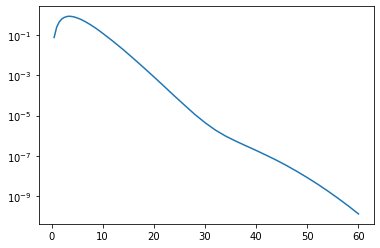

In [27]:
plt.figure()
plt.semilogy(e, e**2 * f)
plt.show()

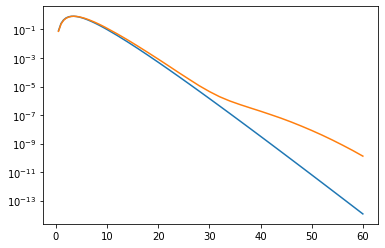

In [28]:
plt.figure()
plt.semilogy(e, (0.78)*(e**2)/(np.exp(e/1.5)+1))
plt.semilogy(e, e**2 * f)
plt.show()

In [29]:
data_file2 = np.load("test-fit2.npz", allow_pickle=True)
e2 = data_file2['eps']
f2 = data_file2['fe']

In [30]:
def fit(e_array, f_array):
    e_max = e_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    f_max = f_array[np.where(e_array**2*f_array == np.max(e_array**2*f_array))[0]][0]
    
    T = e_max/2.301
    N = (((np.exp(e_max/T)+1)*np.max(e_max**2*f_max))/e_max**2)
    
    return T,N
    

In [31]:
fit(e,f)

(1.521077792264233, 0.7584999309603175)

In [32]:
fit(e2,f2)

(2.607561929595828, 13.757361244316078)

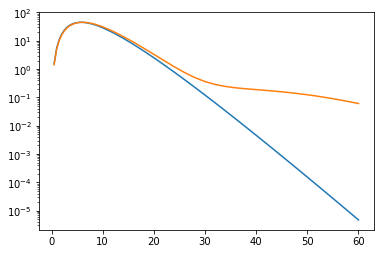

In [33]:
plt.figure()
plt.semilogy(e2, (13.75)*(e2**2)/(np.exp(e2/2.6)+1))
plt.semilogy(e2, e2**2 * f2)
plt.show()

In [34]:
@nb.jit(nopython=True)
def least_sum(e_array,f_array,T, N):
    Sum = 0 
    for i in range(len(e_array)):
        Sum = Sum + ((e_array[i]**2*f_array[i]-((N)*(e_array[i]**2)/(np.exp(e_array[i]/T)+1)))**2)
    return Sum 
  

In [35]:
least_sum(e,f,1.5,0.7)

0.09123742743828692

In [36]:
least_sum(e,f,2*1.5,2*0.7)

390.95232010236873

In [37]:
least_sum(e2,f2,2.6,13.7)

50.171876462258844